In [1]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering, KMeans, AffinityPropagation
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

from utils import *

Analysis can be done by 1) clustering products, or by 2)clustering on location, and then identifying which location clusters products appear in. To complete 1) we work with the transposed dataframe, where products are on the rows. To complete 2), work with the data frame as is. (note axes and transposes)

## 2) Clustering by location

In [2]:
# LOAD DATASET
biomass_data = pd.read_csv('site_data.csv')

In [3]:
# PREP DATA

# Transpose the DataFrame to have products as rows and locations as columns
data_transposed = biomass_data.set_index(['dataset', 'site_name', 'site_id', 'X', 'Y']).T

# Remove non-numeric rows
data_transposed_numeric = data_transposed.select_dtypes(include=[np.number])

# Replace 'NA' with NaN
data_transposed_numeric = data_transposed_numeric.replace('NA', np.nan)

# Drop rows with all NaN values
data_transposed_numeric = data_transposed_numeric.dropna(axis=1, how='all')

# Impute missing values with column mean
imputer = SimpleImputer(strategy='mean')
# Impute missing values with ROW mean (must use transposed df and axis=1 for rows)
data_imputed = data_transposed_numeric.fillna(data_transposed_numeric.mean())

In [4]:
# CLUSTERING

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed.T)

## hierarchical clustering
# cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
# clusters = cluster.fit_predict(data_scaled)

# # kmeans clustering
# cluster = KMeans(n_clusters=5)
# clusters = cluster.fit_predict(data_scaled)

# DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=4)  # Adjust the parameters as needed
clusters = dbscan.fit_predict(data_scaled)

In [5]:
# Add cluster labels to the transposed DataFrame, for 1)
data_imputed.loc['cluster'] = clusters

# Transpose the data back to the original format
biomass_data_clustered = data_imputed.T.reset_index()
biomass_data_clustered

,dataset,site_name,site_id,X,Y,ESA CCI,Chopping et al.,GEDI L4B,Liu et al.,LT-GNN,Menlove & Healey,Xu et al.,cluster
0,NEON,Harvard Forest,HARV,-72.17266,42.53690,105.641579,105.641579,164.080719,37.921211,105.641579,114.922806,105.641579,3.0
1,NEON,Smithsonian Conservation Biology Institute,SCBI,-78.13950,38.89292,185.425120,185.425120,334.279755,115.212837,185.425120,106.782768,185.425120,-1.0
2,NEON,Ordway-Swisher Biological Station,OSBS,-81.99343,29.68927,58.667814,58.667814,63.379155,69.890287,58.667814,42.734001,58.667814,-1.0
3,NEON,UNDERC,UNDE,-89.53725,46.23388,128.700224,128.700224,155.069643,139.331772,128.700224,91.699257,128.700224,-1.0
4,NEON,Konza Prairie Biological Station,KONZ,-96.56309,39.10077,9.483823,9.483823,7.477551,10.838812,9.483823,10.135107,9.483823,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,Ameriflux,NEON University of Notre Dame Environmental Re...,US-xUN,-89.53730,46.23390,128.688774,128.688774,155.035292,139.331772,128.688774,91.699257,128.688774,-1.0
493,Ameriflux,NEON Woodworth (WOOD),US-xWD,-99.24140,47.12820,4.623371,4.623371,4.150213,9.719900,4.623371,0.000000,4.623371,0.0
494,Ameriflux,NEON Wind River Experimental Forest (WREF),US-xWR,-121.95190,45.82050,244.415145,387.440494,357.726868,194.783264,387.440494,320.595123,819.682068,-1.0
495,Ameriflux,NEON Yellowstone Northern Range (Frog Rock) (Y...,US-xYE,-110.53910,44.95350,7.986143,44.295996,37.207724,59.854660,44.295996,36.563770,79.867683,-1.0


biomass_data_clustered has more rows than columns, clustering occured on locations


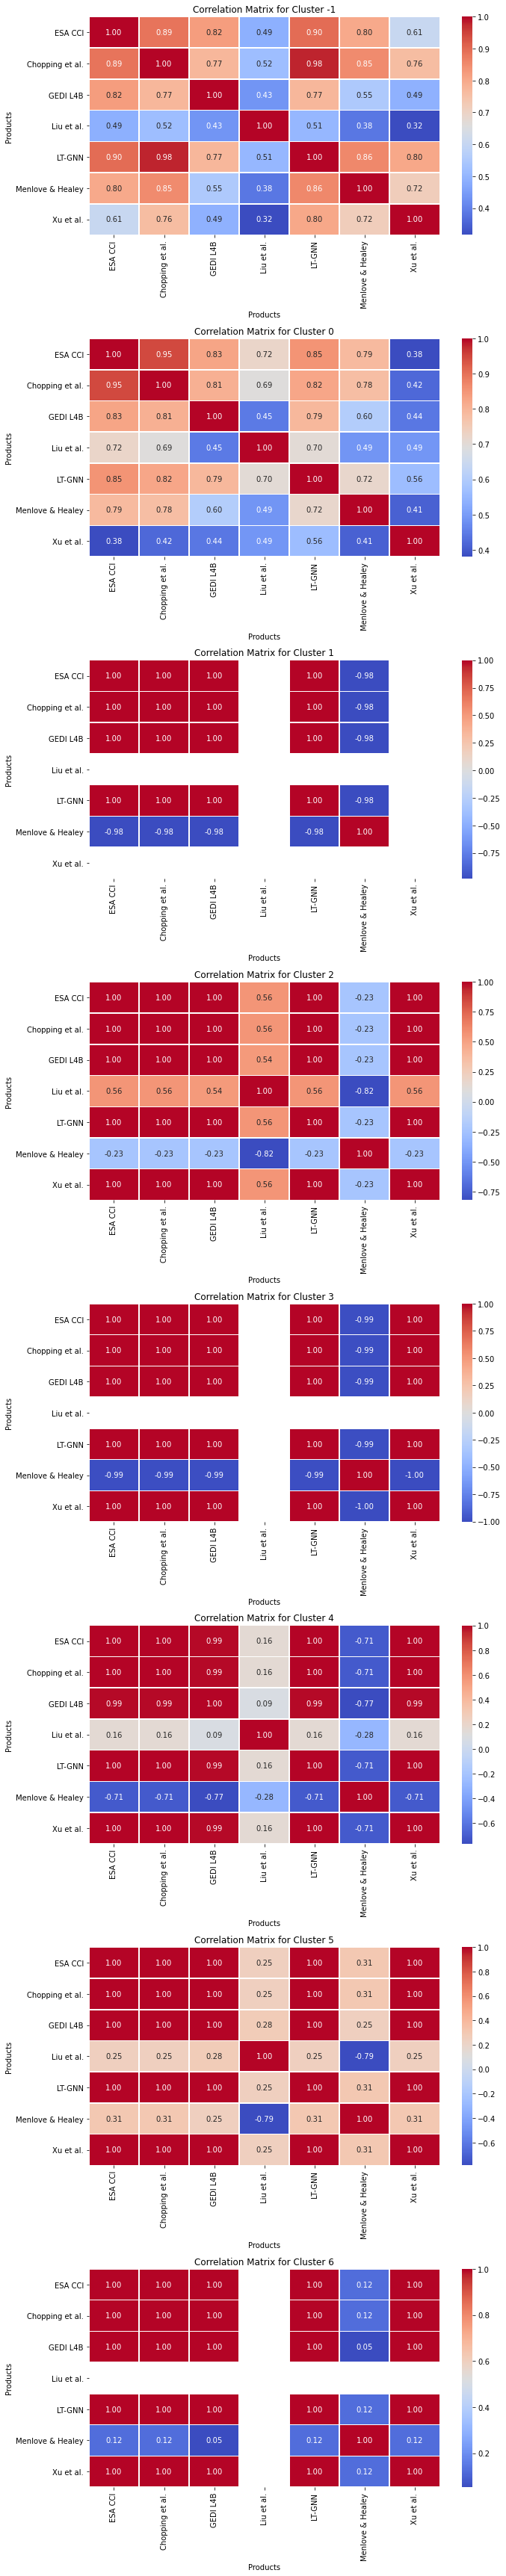

In [6]:
# HEATMAP VISUALIZATION

# Load the dataset
# biomass_data_clustered = pd.read_csv('clustering_product_type.csv')

# List of products
products = ['ESA CCI', 'Chopping et al.', 'GEDI L4B', 'Liu et al.', 'LT-GNN', 'Menlove & Healey', 'Xu et al.']

plot_heat_by_clus(biomass_data_clustered,products)

In [7]:
# METRICS

# Extract predicted cluster labels
predicted_labels = biomass_data_clustered['cluster']

print_indices(data_scaled, predicted_labels)

Silhouette Coefficient: 0.22048287462433225
Calinski-Harabasz Index: 70.05726564497948
Davies-Bouldin Index: 1.5706467335673329
